# Повторение NumPy и SciPy, первое знакомство с Matplotlib и sklearn

## Numpy

In [1]:
import numpy as np

In [2]:
x = [2, 3, 4, 6]
y = np.array(x)

In [3]:
print type(x), x
print type(y), y

<type 'list'> [2, 3, 4, 6]
<type 'numpy.ndarray'> [2 3 4 6]


In [4]:
print x[1:3]

[3, 4]


In [5]:
print y[1:3]

[3 4]


In [6]:
print x[[0, 2]]

TypeError: list indices must be integers, not list

In [7]:
print y[[0, 2]]

[2 4]


In [8]:
print y[y>3]

[4 6]


In [9]:
print x * 5

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]


In [10]:
print y * 5

[10 15 20 30]


In [11]:
print x ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [12]:
print y ** 2

[ 4  9 16 36]


In [13]:
matrix = [[1, 2, 4], [3, 1, 0]]
nd_array = np.array(matrix)

In [14]:
print matrix[1][2]

0


In [15]:
print nd_array[1, 2]

0


In [16]:
print np.random.rand()

0.821146922922


In [17]:
print np.random.randn()

0.203614905448


In [18]:
print np.random.randn(4)

[ 1.50413328 -0.4219358  -0.39287281 -1.03042307]


In [19]:
print np.random.randn(4, 5)

[[-1.06914341 -1.43805915 -1.25736678  1.83297436  0.02684792]
 [ 0.0427816   1.68247283 -0.43900916  1.11494093 -0.65060144]
 [ 0.11921417 -0.8785154   0.48333239 -0.5001237  -0.16347789]
 [-2.12429332 -0.42891826  0.9329836  -0.10526841  1.74147527]]


In [20]:
print np.arange(0, 8, 0.1)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9]


In [21]:
print range(0, 8, 0.1)

TypeError: range() integer step argument expected, got float.

In [22]:
%timeit np.arange(0, 10000)
%timeit range(0, 10000)

10000 loops, best of 3: 17.1 µs per loop
10000 loops, best of 3: 158 µs per loop


## Задание по numpy
1. Напишите свой аналог np.linspace с использованием цикла и с использованием list comprehension. Сравните все три варианта по производительности
1. Сравните по производительности основные операции с массивами (array) numpy и с list


In [23]:
help(np.linspace)


Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

In [24]:
def f1(start, stop, num):
    listt = [start]
    len = (stop - start) / (1.0 * num)
    i = start
    while i + len <= stop:
        listt.append(i + len)
        i = i + len 
    return listt

In [25]:
def f2(start, stop, num):
    listt = []
    for i in range(start, stop, (stop - start) / num):
        listt.append(i)
    return listt

In [26]:
start = 1
stop = 101
num = 50

In [27]:
%timeit f1(start, stop, num)

10000 loops, best of 3: 22.6 µs per loop


In [28]:
%timeit f2(start, stop, num)

100000 loops, best of 3: 10.6 µs per loop


In [29]:
%timeit np.linspace(start, stop, num)

The slowest run took 5.10 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 45.5 µs per loop


## SciPy

In [30]:
from scipy import optimize

In [31]:
def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3

print f([3.2, 0.1])

3.0


In [32]:
x_min = optimize.minimize(f, [5, 5])
print x_min

      fun: 3.0000000000011435
 hess_inv: array([[ 0.94055055, -0.16183475],
       [-0.16183475,  0.55944947]])
      jac: array([ -2.05636024e-06,   5.36441803e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ 3.19999896,  0.10000026])


In [33]:
print x_min.x

[ 3.19999896  0.10000026]


In [34]:
from scipy import linalg

In [35]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

x = linalg.solve(a, b)
print x

[ 2. -2.  9.]


In [36]:
print np.dot(a, x)

[ 2.  4. -1.]


In [37]:
X = np.random.randn(4, 3)
U, D, V = linalg.svd(X)
print U.shape, D.shape, V.shape
print type(U), type(D), type(V)

(4L, 4L) (3L,) (3L, 3L)
<type 'numpy.ndarray'> <type 'numpy.ndarray'> <type 'numpy.ndarray'>


## Задание по scipy
Попробуйте поменять метод оптимизации в примере решения оптимизационной задачи выше, и подобрать метод с наименьшим количеством вычислений функции. Начальное приближение оставьте тем же.

In [38]:
help(optimize.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, op

In [39]:
x_min = optimize.minimize(f, [5, 5], method ='L-BFGS-B' )
print x_min

      fun: 3.0000000000006546
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  4.88498131e-07,  -1.55431223e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 9
      nit: 2
   status: 0
  success: True
        x: array([ 3.20000025,  0.09999923])


## Matplotlib

In [40]:
%matplotlib inline

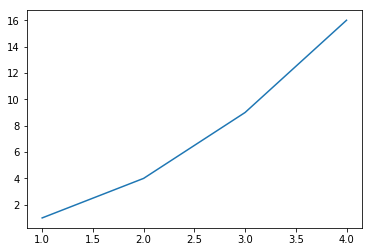

In [41]:
from matplotlib import pylab as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

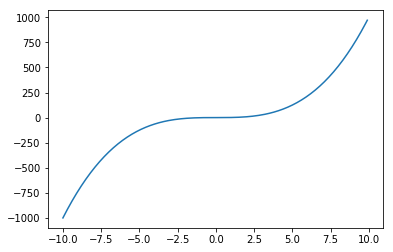

In [42]:
x = np.arange(-10, 10, 0.1)
y = x ** 3
plt.plot(x, y)
plt.show()

## Задание по Matplotlib
1. Добавьте подписи к осям и легенду к примеру выше (см. документацию)
1. Постройте график с 5 разными элементарными функциями и сделайте легенду к графику в TeXe
1. Сохраните рисунок в файл строчкой кода на Python

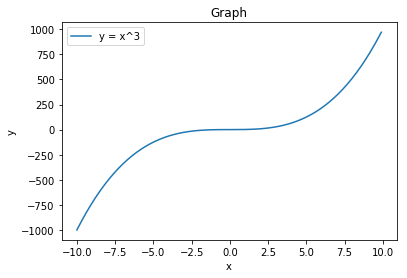

In [43]:
x = np.arange(-10, 10, 0.1)
y = x ** 3
plt.plot(x, y, label = "y = x^3")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph")
plt.legend()

plt.show()
plt.savefig ("pic.jpg")
#file appears to be a white rectangle with no graph... 
#plt.close()

## Все вместе (numpy + scipy + matplotlib)

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [45]:
np.random.seed(42)

In [46]:
np.random.RandomState(42)

In [47]:
x = np.arange(0, 10, 2)
y = np.exp(-x/3.0) + np.random.randn(len(x)) * 0.05

print x[:5]
print y[:5]

[0 2 4 6 8]
[ 1.02483571  0.5065039   0.29598157  0.21148678  0.05777578]


In [48]:
f = interpolate.interp1d(x, y, kind='quadratic')
xnew = np.arange(0, 8, 0.1)
ynew = f(xnew)

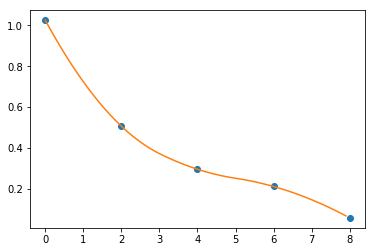

In [49]:
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

## Задание на Numpy+Matplotlib

1. Сгенерируйте массив из 500 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 2x - 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
2. Сгенерируйте массив из 100 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
3. Изобразите первый и второй массив точек на плоскости (используя два разных цвета), а также график функии $f(x) = 2x - 1$ (используя какой-нибудь третий цвет)

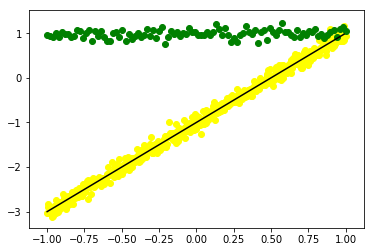

In [50]:
x500 = np.linspace(-1, 1, 500)
y500 = 2 * x500 - 1 + np.random.normal(0, 0.1, 500)

x100 = np.linspace(-1, 1, 100)
y100 = 1 + np.random.normal(0, 0.1, 100)

x = np.arange(-1, 1, 0.01)
y = 2 * x - 1


plt.scatter(x500, y500, color = 'yellow')
plt.scatter(x100, y100, color = 'green')
plt.plot(x, y, color = 'black')

In [79]:
x600 = np.hstack((x500, x100))
y600 = np.hstack((y500, y100))

In [80]:
def poly(xx, coeffs):
    return sum([coeffs[k] * xx ** k for k in range(len(coeffs))])

In [81]:
def lossf_square_500(coeffs):
    loss = sum((poly(x500, coeffs) - y500) ** 2)
    return loss

In [82]:
def lossf_square_600(coeffs):
    loss = sum((poly(x600, coeffs) - y600) ** 2)
    return loss

In [83]:
def lossf_abs_500(coeffs):
    loss = sum(abs(poly(x500, coeffs) - y500))
    return loss

In [84]:
def lossf_abs_600(coeffs):
    loss = sum(abs(poly(x600, coeffs) - y600))
    return loss

In [85]:
result_square = optimize.minimize(lossf_square_600, np.array([5,3]))
print result_square.x

[-0.66798886  1.67243003]


In [87]:
result_abs = optimize.minimize(lossf_abs, np.array([5,3]))
print result_abs.x

[-0.99868339  1.99987275]


In [88]:
y600_square = result_square.x[0] + result_square.x[1] * x600
y600_abs = result_abs.x[0] + result_abs.x[1] * x600

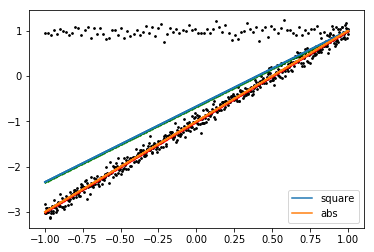

In [98]:
plt.scatter(x600, y600, s = 3, color = 'black')

plt.scatter(x600, y600_square, s = 1, color = 'green')
plt.scatter(x600, y600_abs, s = 1, color = 'red')

plt.plot(x600, y600_square, label = "square")
plt.plot(x600, y600_abs, label = "abs")
plt.legend()